SystemExit: 0

D:\DATA\n.gameiro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


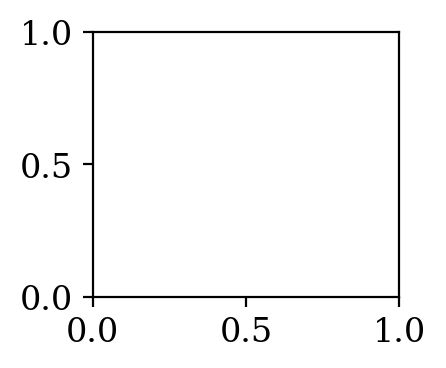

In [3]:
import glob
import sys
import os
import subprocess
import shlex
import re
from PyQt5.QtWidgets import *
#QMainWindow,QApplication,QRadioButton,QWidget,QPushButton,QAction,QLineEdit,QGridLayout,QGroupBox,QMessageBox,QHBoxLayout,QComboBox,QVBoxLayout,QLabel,QStatusBar,QCheckBox,QSlider,QFileDialog,QTabWidget
from PyQt5.QtCore import *
from PyQt5.QtGui import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
#import pygmsh

#Script Appli

#https://www.mfitzp.com/tutorials/layouts/

class Canvas(FigureCanvas):
    def __init__(self,parent):
        fig, self.ax = plt.subplots(figsize=(5,4),dpi=200)
        super().__init__(fig)
        self.setParent(parent)

class MainWindow(QMainWindow):
    def __init__(self):
        QMainWindow.__init__(self)
        self.initUI()
        self.Tab_Solver()
        self.body()

    def initUI(self):
        ### Paramètres de définition de la fenetre principale
        self.setMinimumSize(QSize(200, 400)) #Window size width and height
        width, height = 400, 400
        #self.setFixedWidth(width) # setting  the fixed width of window
        #self.setFixedHeight(height)  # setting  the fixed width of window
        self.setGeometry(300, 300, width, height)
        self.setWindowTitle("FEM")

    def Tab_Solver(self):
        self.cb1 = QComboBox()
        self.cb1.addItems(["barre","poutre","E-B","Timo"])

        #solver
        self.t1 = QLineEdit()
        self.t2 = QLineEdit()
        self.t3 = QLineEdit()
        self.t4 = QLineEdit()
        self.t5 = QLineEdit()

        self.te = QTextEdit()

        #Progressbar
        self.bar = QProgressBar()
        self.bar.setValue(0)
        self.bar.setMaximum(100)

        # solver
        self.Load_cfg = QPushButton("Charger un config .cfg")
        self.Launch2 = QPushButton("Lancer SU2")
        
#    def ajouter_noeud(self) :


    def body(self):

        # Add Status Bar
        self.statusBar = QStatusBar()
        self.setStatusBar(self.statusBar)
        self.statusBar.showMessage("Current Folder Location :" + os.getcwd())

        # Creation des labels

        # Creation des boutons
        #maillage
        self.Load_mesh = QPushButton("Charger un maillage .su2")

        # Creation textbox
        #maillage
        self.t11 = QLineEdit()
        self.t12 = QLineEdit()
        self.t13 = QLineEdit()
        
        self.x = QLineEdit()
        self.y = QLineEdit()
        self.z = QLineEdit()

        #Creation Groupbox
        self.groupbox1 = QGroupBox("Maillage :")

        ######### STRUCTURE ############
        ### MAILLAGE
        hbox1 = QHBoxLayout()
        hbox1.addWidget(QLabel("Ajouter un noeud :"))
        hbox1.addWidget(self.x)
        hbox1.addWidget(self.y)
        hbox1.addWidget(self.z)
        vbox1 = QVBoxLayout(self)
        #vbox1.addWidget(hbox1)
        vbox1.addWidget(QLabel("Dimension du maillage :"))
        vbox1.addWidget(self.t11)
        vbox1.addWidget(QLabel("Nombre d'element :"))
        vbox1.addWidget(self.t12)
        vbox1.addWidget(self.Load_mesh)
        self.groupbox1.setLayout(vbox1)

        # Creation TAB
        self.tabWidget = QTabWidget()
        self.setCentralWidget(self.tabWidget)

        self.tab1 = QWidget()
        self.tabWidget.addTab(self.tab1, "Maillage")
        #self.openFile = QPushButton("Choose Tab ", self.tab1)
        self.tab1.setLayout(vbox1)

        self.tab4 = QWidget()
        chart = Canvas(self)
        self.tabWidget.addTab(chart, "Plot")

    def getFile(self):
        """ This function will get the address of the file location
        """
        self.filename = QFileDialog.getOpenFileName(filter="txt (*.txt)")[0] #argument : filter="csv (*.csv)"
        print("File :", self.filename)
        self.statusBar.showMessage("Maillage chargé : " + self.filename)
        self.t5.setText(self.filename)

    def Click_su2(self):
        #On doit se deplacer pour se mettre dans le dossier du fichier ou alors on peut mettre dans le fichier config le chemin absolu du fichier maillage
        #on triche :
        print(os.getcwd())
        os.chdir("C://Users//Gameiro//Documents//CFD//SU2-master//QuickStart")
        print(os.getcwd())
        self.statusBar.showMessage('Lancement de SU2')
        #recupère le nom fichier config
        config_name = self.t5.text()
        os.system("SU2_CFD "+ config_name) #inv_NACA0012.cfg
        #ProgressBar update

    def newCall(self):
        print('New')

    def exitCall(self):
        print('Exit app')
        sys.exit(app.exec_())


def main():
    app = QApplication(sys.argv)
    #ex = combodemo()
    #ex.show()
    mainWin = MainWindow()
    #['Breeze', 'Oxygen', 'QtCurve', 'Windows', 'Fusion']
    app.setStyle('Fusion')
    mainWin.show()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()